In [120]:
import pandas as pd
import numpy as np
import sqlite3
import matplotlib.pyplot as plt
import wordcloud as wc

In [2]:
version1_path = "../data/raw/td_V1.db"
version2_path = "../data/raw/td_V2.db"
con1 = sqlite3.connect(version1_path)
con2 = sqlite3.connect(version2_path)

In [3]:
light_q = """SELECT key
     FROM jira_issues"""

heavy_q = """SELECT *
     FROM jira_issues"""

commits_q = """SELECT *
    FROM git_commits"""

In [4]:
light1 = pd.read_sql(light_q, con1)
light2 = pd.read_sql(light_q, con2)

In [5]:
heavy1 = pd.read_sql(heavy_q, con1)
heavy2 = pd.read_sql(heavy_q, con2)

In [6]:
heavy1.columns

Index(['projectID', 'key', 'creationDate', 'resolutionDate', 'updateDate',
       'dueDate', 'resolution', 'type', 'priority', 'fixVersions', 'versions',
       'timeSpent', 'aggregatedTimeSpent', 'timeEstimate',
       'timeOriginalEstimate', 'aggregateTimeEstimate', 'progressPercent',
       'componentName', 'componentDescription', 'description', 'summary',
       'watchCount', 'votes', 'labels', 'creatorName', 'creatorActive',
       'assignee', 'reporter'],
      dtype='object')

In [7]:
heavy2.columns

Index(['PROJECT_ID', 'KEY', 'CREATION_DATE', 'RESOLUTION_DATE', 'HASH',
       'COMMIT_DATE'],
      dtype='object')

In [8]:
light1.shape, light2.shape

((67427, 1), (22007, 1))

In [9]:
heavy1.shape, heavy2.shape

((67427, 28), (22007, 6))

In [10]:
len(set(light1["key"]).intersection(set(light2["KEY"])))

9300

In [11]:
commits1 = pd.read_sql(commits_q, con1)
commits2 = pd.read_sql(commits_q, con2)

In [12]:
commits1.shape, commits2.shape

((140687, 13), (81072, 13))

In [13]:
len(set(commits1["commitHash"]).intersection(set(commits2["COMMIT_HASH"])))

75009

In [30]:
heavy1.columns

Index(['projectID', 'key', 'creationDate', 'resolutionDate', 'updateDate',
       'dueDate', 'resolution', 'type', 'priority', 'fixVersions', 'versions',
       'timeSpent', 'aggregatedTimeSpent', 'timeEstimate',
       'timeOriginalEstimate', 'aggregateTimeEstimate', 'progressPercent',
       'componentName', 'componentDescription', 'description', 'summary',
       'watchCount', 'votes', 'labels', 'creatorName', 'creatorActive',
       'assignee', 'reporter'],
      dtype='object')

In [128]:
len(set(heavy1["key"])), len(heavy1)

(67427, 67427)

In [15]:
full_text = heavy1["description"].to_string()

In [17]:
full_text2 = ""
for i, row in heavy1.iterrows():
    full_text2 += row["description"] + " "
    

In [ ]:
my_word_cloud = wc.WordCloud(background_color="white").generate(full_text)

In [ ]:
plt.imshow(my_word_cloud, interpolation='bilinear')

- contar nans del text
- contar nans de data ini, data fi, data due
- histograma de les longituds dels textos

In [50]:
# number of null descriptions
print("NA values:", sum(heavy1["description"].isna()))
proportion = sum(heavy1["description"]=="") / len(heavy1)
print("Empty values:", sum(heavy1["description"]==""), f" Proportion:{proportion:.03}")
print("All the values:", len(heavy1))

NA values: 0
Empty values: 5985  Proportion:0.0888
All the values: 67427


In [58]:
# number of null descriptions
print("NA values:", sum(heavy1["summary"].isna()))
proportion = sum(heavy1["summary"]=="") / len(heavy1)
print("Empty values:", sum(heavy1["summary"]==""), f" Proportion:{proportion:.03}")
print("All the values:", len(heavy1))

NA values: 0
Empty values: 0  Proportion:0.0
All the values: 67427


In [51]:
# number of null dates
variable = "creationDate"
print(variable)
print("NA values:", sum(heavy1[variable].isna()))
proportion = sum(heavy1[variable]=="") / len(heavy1)
print("Empty values: ", sum(heavy1[variable]==""), f"Proportion: {proportion:.03}")

creationDate
NA values: 0
Empty values:  0 Proportion: 0.0


In [52]:
# number of null dates
variable = "updateDate"
print(variable)
print("NA values:", sum(heavy1[variable].isna()))
proportion = sum(heavy1[variable]=="") / len(heavy1)
print("Empty values: ", sum(heavy1[variable]==""), f"Proportion: {proportion:.03}")

updateDate
NA values: 0
Empty values:  0 Proportion: 0.0


In [53]:
# number of null dates
variable = "resolutionDate"
print(variable)
print("NA values:", sum(heavy1[variable].isna()))
proportion = sum(heavy1[variable]=="") / len(heavy1)
print("Empty values: ", sum(heavy1[variable]==""), f"Proportion: {proportion:.03}")

resolutionDate
NA values: 0
Empty values:  10705 Proportion: 0.159


In [54]:
# number of null dates
variable = "dueDate"
print(variable)
print("NA values:", sum(heavy1[variable].isna()))
proportion = sum(heavy1[variable]=="") / len(heavy1)
print("Empty values: ", sum(heavy1[variable]==""), f"Proportion: {proportion:.03}")

dueDate
NA values: 0
Empty values:  66546 Proportion: 0.987


In [57]:
# number of null dates
variable = "timeOriginalEstimate"
print(variable)
print("NA values:", sum(heavy1[variable].isna()))
proportion = sum(heavy1[variable]=="") / len(heavy1)
print("Empty values: ", sum(heavy1[variable]==""), f"Proportion: {proportion:.03}")

timeOriginalEstimate
NA values: 0
Empty values:  66050 Proportion: 0.98


In [56]:
# number of null dates
variable = "aggregatedTimeSpent"
print(variable)
print("NA values:", sum(heavy1[variable].isna()))
proportion = sum(heavy1[variable]=="") / len(heavy1)
print("Empty values: ", sum(heavy1[variable]==""), f"Proportion: {proportion:.03}")

aggregatedTimeSpent
NA values: 0
Empty values:  61313 Proportion: 0.909


In [60]:
import matplotlib.pyplot as plt

In [108]:
desc_lens = heavy1["description"].apply(lambda x: len(x.split(" ")))
desc_no_outlier_lens = desc_lens[desc_lens< 20_000]

sum_lens = heavy1["summary"].apply(lambda x: len(x.split(" ")))
sum_no_outlier_lens = sum_lens[sum_lens< 40_000]

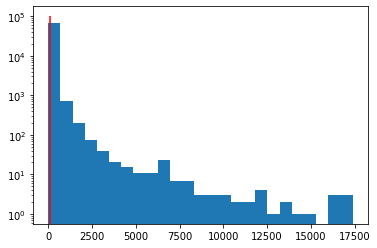

In [123]:
_ = plt.hist(desc_no_outlier_lens, log=True, bins = 25)
plt.vlines(np.mean(desc_no_outlier_lens), ymin=0, ymax = 10**5, colors="red")

In [124]:
np.mean(desc_no_outlier_lens)

105.37791456541086

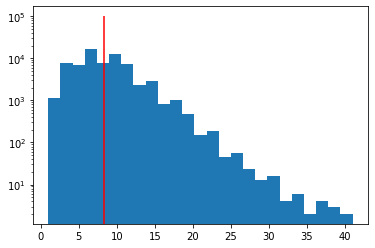

In [125]:
_ = plt.hist(sum_no_outlier_lens, log=True, bins = 25)
plt.vlines(np.mean(sum_no_outlier_lens), ymin=0, ymax = 10**5, colors="red")

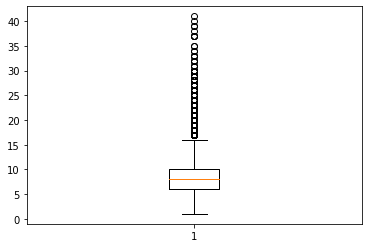

In [131]:
_ = plt.boxplot(sum_no_outlier_lens)

In [161]:
import datetime as dt

def parse_date(x):
    if x == "":
        return dt.datetime(2000, 1,1)
    return dt.datetime.strptime(x.split("T")[0], "%Y-%m-%d")

TypeError: The DTypes <class 'numpy.dtype[float64]'> and <class 'numpy.dtype[timedelta64]'> do not have a common DType. For example they cannot be stored in a single array unless the dtype is `object`.

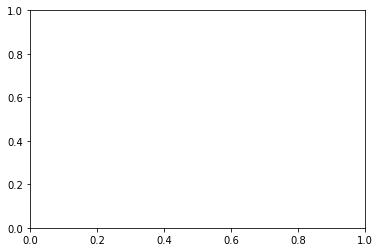

In [162]:
durations = heavy1["creationDate"].apply(parse_date) - heavy1["resolutionDate"].apply(parse_date)
_ = plt.hist(durations)